In [1]:
import numpy as np
import hyperspy.api as hys
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import tkinter.filedialog as tkf
import tifffile
plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [9]:
ini_channel = 280.0
fin_channel = 315.0
dispersion = 0.025
e_range = np.arange(ini_channel, fin_channel, dispersion)
print(e_range.shape)

(1400,)


In [6]:
spectra_adr = tkf.askopenfilenames()
print(*spectra_adr, sep="\n")

D:/g_drive/data_repository/EELS/00000000_amorphous_carbon_EELS/20200726_amorphous_C_B_doped_TZ/20200925_processed/A2_Deconvolved SI.dm3
D:/g_drive/data_repository/EELS/00000000_amorphous_carbon_EELS/20200726_amorphous_C_B_doped_TZ/20200925_processed/A3_Deconvolved SI.dm3


In [ ]:
spectra = tifffile.imread(spectra_adr)
print(spectra.shape)
spectra = spectra.squeeze()
print(spectra.shape)

In [7]:
spectra = []
for adr in spectra_adr:
    tmp = hys.load(adr, signal_type="EELS")
    tmp = tmp.isig[ini_channel:fin_channel]
    data = tmp.data.clip(min=0.0)
    tmp_spectrum = np.mean(data, axis=(0, 1))
    spectra.append(tmp_spectrum)
    
spectra = np.asarray(spectra)
print(spectra.shape)

(2, 1400)


In [ ]:
spectra = []
for adr in spectra_adr:
    tmp = hys.load(adr, signal_type="EELS")
    tmp = tmp.isig[ini_channel:fin_channel]
    spectra.append(tmp.data)
    
spectra = np.asarray(spectra)
print(spectra.shape)

In [8]:
num_s = len(spectra)
print(num_s)

2


In [10]:
for i, spec in enumerate(spectra):
    spectra[i] = spec - np.min(spec)

In [11]:
pi_peak = find_nearest(e_range, 285.0)
print(pi_peak)

ini_ind_align = find_nearest(e_range, 282.0)
fin_ind_align = find_nearest(e_range, 288.0)
pi_peak_ind = []
for i in range(num_s):
    pi_peak_ind.append(ini_ind_align+np.argmax(spectra[i][ini_ind_align:fin_ind_align]))
    
pi_peak_ind = np.asarray(pi_peak_ind)
print(pi_peak_ind)

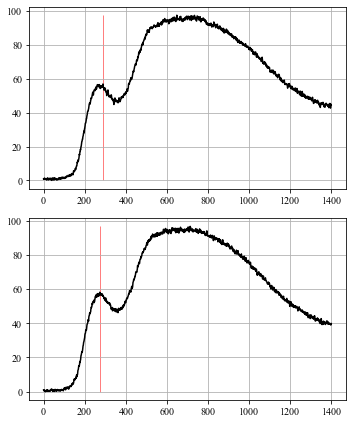

In [14]:
fig, ax = plt.subplots(num_s, 1, figsize=(5, num_s*3))
for i in range(num_s):
    ax[i].plot(spectra[i], 'k-')
    ax[i].fill_between([pi_peak_ind[i], pi_peak_ind[i]+1], np.max(spectra[i]), 
                alpha=0.5, color="red")
    ax[i].grid()
fig.tight_layout()
plt.show()

In [ ]:
pi_ind_diff = pi_peak_ind - pi_peak
print(pi_ind_diff)

e_ranges = []
for i in range(num_s):
    tmp = np.arange(ini_channel-pi_peak_ind[i]*dispersion, fin_channel-pi_peak_ind[i]*dispersion, dispersion)
    e_ranges.append(tmp)
    print(tmp[0], tmp[-1])

In [ ]:
pi_onset = 282.0
pi_final = 289.0
sigma_final = 310.0

In [ ]:
left_ind = (pi_onset - ini_channel) / dispersion
right_ind = (pi_final - ini_channel) / dispersion
print(left_ind, right_ind)
pi_range = e_range[int(left_ind):int(right_ind)]
pi_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(pi_range.shape)
print(pi_range[0], pi_range[-1])
print(pi_range_spectra.shape)

In [ ]:
left_ind = (pi_onset - ini_channel) / dispersion
right_ind = (sigma_final - ini_channel) / dispersion
print(left_ind, right_ind)
pi_sigma_range = e_range[int(left_ind):int(right_ind)]
pi_sigma_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(pi_sigma_range.shape)
print(pi_sigma_range[0], pi_sigma_range[-1])
print(pi_sigma_range_spectra.shape)

In [ ]:
fig, ax = plt.subplots(num_s, 1, figsize=(5, num_s*3))
for i in range(num_s):
    ax[i].plot(e_range, spectra[i], 'k-')
    Epi = np.trapz(pi_range_spectra[i], pi_range)
    Episigma = np.trapz(pi_sigma_range_spectra[i], pi_sigma_range)
    #print(Epi, Esigma)
    sp23_ratio = Epi / Episigma
    print(sp23_ratio)
    ax[i].set_title("label %d, sp2/sp3 ratio=%f"%(i, sp23_ratio))
    ax[i].fill_between([pi_range[0], pi_range[-1]], np.max(spectra.data), 
                alpha=0.5, color="red")
    ax[i].fill_between([pi_sigma_range[0], pi_sigma_range[-1]], np.max(spectra.data), 
                alpha=0.5, color="blue")
    ax[i].grid()
#fig.legend(fontsize="x-large")
fig.tight_layout()
plt.show()

In [ ]:
pi_center = 286.0
pi_half_wsize = 2.0
sigma_center = 294.0
sigma_half_wsize = 5.0

In [ ]:
print(pi_center-pi_half_wsize , pi_center+pi_half_wsize )
left_ind = ((pi_center-pi_half_wsize) - ini_channel) / dispersion
right_ind = ((pi_center+pi_half_wsize) - ini_channel) / dispersion
print(left_ind, right_ind)
pi_range = e_range[int(left_ind):int(right_ind)]
pi_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(pi_range.shape)
print(pi_range[0], pi_range[-1])
print(pi_range_spectra.shape)

In [ ]:
print(sigma_center-sigma_half_wsize, sigma_center+sigma_half_wsize)
left_ind = ((sigma_center-sigma_half_wsize) - ini_channel) / dispersion
right_ind = ((sigma_center+sigma_half_wsize) - ini_channel) / dispersion
print(left_ind, right_ind)
sigma_range = e_range[int(left_ind):int(right_ind)]
sigma_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(sigma_range.shape)
print(sigma_range[0], sigma_range[-1])
print(sigma_range_spectra.shape)

In [ ]:
fig, ax = plt.subplots(num_s, 1, figsize=(5, num_s*3))
for i in range(num_s):
    ax[i].plot(e_range, spectra[i], 'k-')
    Epi = np.trapz(pi_range_spectra[i], pi_range)
    Esigma = np.trapz(sigma_range_spectra[i], sigma_range)
    #print(Epi, Esigma)
    sp23_ratio = Epi / (Epi+Esigma)
    print(sp23_ratio)
    ax[i].set_title("label %d, sp2/sp3 ratio=%f"%(i, sp23_ratio))
    ax[i].fill_between([pi_range[0], pi_range[-1]], np.max(spectra.data), 
                alpha=0.5, color="orange")
    ax[i].fill_between([sigma_range[0], sigma_range[-1]], np.max(spectra.data), 
                alpha=0.5, color="blue")
    ax[i].grid()
#fig.legend(fontsize="x-large")
fig.tight_layout()
plt.show()

In [ ]:
def gauss_p1(x, a, sigma):
    return a*np.exp(-(x-286.0)**2/(2*sigma**2))

def gauss_p2(x, a, sigma):
    return a*np.exp(-(x-289.0)**2/(2*sigma**2))

def gauss_p3(x, a, sigma):
    return a*np.exp(-(x-294.0)**2/(2*sigma**2))

In [ ]:
def lorentz_p1(x, gamma):
    return gamma / (2 * np.pi * ((x-286.0)**2 + (gamma/2)**2))

def lorentz_p2(x, a, gamma):
    return gamma / (2 * np.pi * ((x-289.0)**2 + (gamma/2)**2))

def lorentz_p3(x, a, gamma):
    return gamma / (2 * np.pi * ((x-294.0)**2 + (gamma/2)**2))

In [ ]:
p1_center = 286.0
p1_half_wsize = 0.5
p2_center = 288.0
p2_half_wsize = 0.5
p3_center = 293.0
p3_half_wsize = 0.5

In [ ]:
print(p1_center-p1_half_wsize , p1_center+p1_half_wsize )
left_ind = ((p1_center-p1_half_wsize) - ini_channel) / dispersion
right_ind = ((p1_center+p1_half_wsize) - ini_channel) / dispersion
print(left_ind, right_ind)
p1_range = e_range[int(left_ind):int(right_ind)]
p1_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(p1_range.shape)
print(p1_range[0], p1_range[-1])
print(p1_range_spectra.shape)

In [ ]:
print(p2_center-p2_half_wsize , p2_center+p2_half_wsize )
left_ind = ((p2_center-p2_half_wsize) - ini_channel) / dispersion
right_ind = ((p2_center+p2_half_wsize) - ini_channel) / dispersion
print(left_ind, right_ind)
p2_range = e_range[int(left_ind):int(right_ind)]
p2_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(p2_range.shape)
print(p2_range[0], p2_range[-1])
print(p2_range_spectra.shape)

In [ ]:
print(p3_center-p3_half_wsize , p3_center+p3_half_wsize )
left_ind = ((p3_center-p3_half_wsize) - ini_channel) / dispersion
right_ind = ((p3_center+p3_half_wsize) - ini_channel) / dispersion
print(left_ind, right_ind)
p3_range = e_range[int(left_ind):int(right_ind)]
p3_range_spectra = spectra[:, int(left_ind):int(right_ind)]
print(p3_range.shape)
print(p3_range[0], p3_range[-1])
print(p3_range_spectra.shape)

In [ ]:
popt_gauss = []
for i in range(num_s):
    tmp = []
    tmp.append(curve_fit(gauss_p1, p1_range, p1_range_spectra[i]))
    tmp.append(curve_fit(gauss_p2, p2_range, p2_range_spectra[i]))
    tmp.append(curve_fit(gauss_p3, p3_range, p3_range_spectra[i]))
    popt_gauss.append(tmp)

In [ ]:
p_gauss = []
for i in range(num_s):
    tmp = []
    tmp.append(gauss_p1(e_range, *popt_gauss[0][0][0]))
    tmp.append(gauss_p2(e_range, *popt_gauss[0][1][0]))
    tmp.append(gauss_p3(e_range, *popt_gauss[0][2][0]))
    p_gauss.append(tmp)

In [ ]:
fig, ax = plt.subplots(num_s, 1, figsize=(5, num_s*3))
for i in range(num_s):
    ax[i].plot(e_range, spectra[i], 'k-')
    ax[i].plot(e_range, p_gauss[i][0], 'r-')
    ax[i].plot(e_range, p_gauss[i][1], 'g-')
    ax[i].plot(e_range, p_gauss[i][2], 'b-')
    ax[i].set_title("label %d"%(i))
    ax[i].grid()
#fig.legend(fontsize="x-large")
fig.tight_layout()
plt.show()

In [ ]:
popt_lorentz = []
for i in range(num_s):
    tmp = []
    tmp.append(curve_fit(lorentz_p1, p1_range, p1_range_spectra[i]))
    tmp.append(curve_fit(lorentz_p2, p2_range, p2_range_spectra[i]))
    tmp.append(curve_fit(lorentz_p3, p3_range, p3_range_spectra[i]))
    popt_lorentz.append(tmp)

In [ ]:
p_lorentz = []
for i in range(num_s):
    tmp = []
    tmp.append(lorentz_p1(e_range, *popt_lorentz[0][0][0]))
    tmp.append(lorentz_p2(e_range, *popt_lorentz[0][1][0]))
    tmp.append(lorentz_p3(e_range, *popt_lorentz[0][2][0]))
    p_lorentz.append(tmp)

In [ ]:
fig, ax = plt.subplots(num_s, 1, figsize=(5, num_s*3))
for i in range(num_s):
    ax[i].plot(e_range, spectra[i], 'k-')
    ax[i].plot(e_range, p_lorentz[i][0], 'r-')
    ax[i].plot(e_range, p_lorentz[i][1], 'g-')
    ax[i].plot(e_range, p_lorentz[i][2], 'b-')
    ax[i].set_title("label %d"%(i))
    ax[i].grid()
#fig.legend(fontsize="x-large")
fig.tight_layout()
plt.show()